 # Regresion lineal gradientes(Vino Blanco)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Cargamos los datos

In [2]:
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## A razon de lo aprendido cuando interactuamos con la libreria seaborn, se aprovecho realizar un HeatMap

<AxesSubplot:>

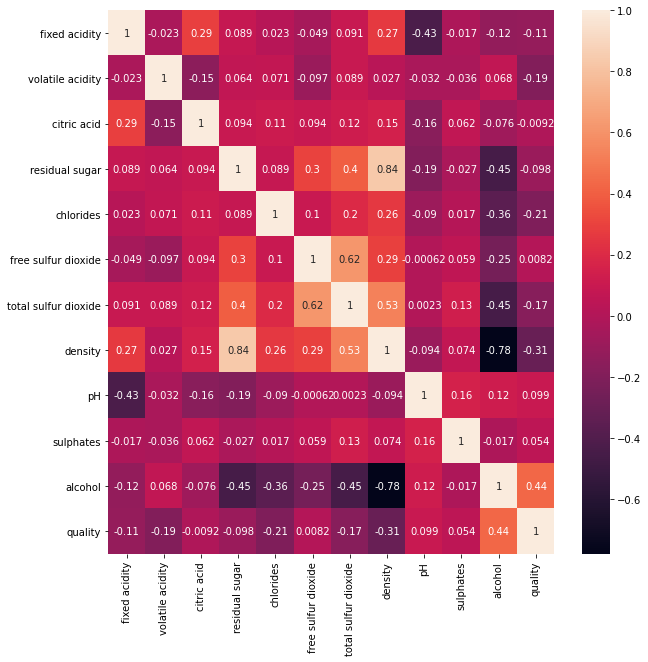

In [3]:
fig, ax = plt.subplots(figsize=(10,10))   
sb.heatmap(data.corr(), annot=True, ax= ax)

# Reconstruccion de los datos

In [4]:
x = data.loc[:, data.columns != 'quality'].to_numpy()
y = data.loc[:, data.columns == 'quality'].to_numpy().tolist()
x

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [5]:
y = np.array(y)
y

array([[6],
       [6],
       [6],
       ...,
       [6],
       [7],
       [6]])

# Normalizacion de datos

In [6]:

for i in range(x.shape[1]):
    max = x[:,i].max()
    min = x[:,i].min()
    x[:,i] = (x[:,i] - min)/(max - min)

# Division de los datos

In [7]:
x_train = []
y_train = []

x_test = []
y_test = []

for i in range(len(data)):
    if i <= int(len(data) * 0.8) : 
        x_train.append(x[i])
        y_train.append(y[i])
    elif  i > int(len(data) * 0.8) :
        y_test.append(y[i])
        x_test.append(x[i])


x_train = np.array(x_train)
y_train = np.array(y_train)
y_test  = np.array(y_test)
x_test = np.array(x_test)


In [8]:
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)

x_train.shape[0]

3919

In [9]:
x_test.shape[0]

979

In [10]:
y_test.shape[0]

979

In [11]:
x_train

array([[1.        , 0.30769231, 0.18627451, ..., 0.25454545, 0.26744186,
        0.12903226],
       [1.        , 0.24038462, 0.21568627, ..., 0.52727273, 0.31395349,
        0.24193548],
       [1.        , 0.41346154, 0.19607843, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [1.        , 0.31730769, 0.28431373, ..., 0.40909091, 0.05813953,
        0.90322581],
       [1.        , 0.23076923, 0.19607843, ..., 0.41818182, 0.34883721,
        0.22580645],
       [1.        , 0.25      , 0.26470588, ..., 0.36363636, 0.20930233,
        1.        ]])

In [12]:
y_train = y_train.reshape(y_train.shape[0],)

y_train[:10]

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

Siguiendo los metodos tradicionales en las pruebas de datos por aprendizaje automático, nos aseguramos de crear datos para entrenar, y datos para probar, con eso podemos probar nuestra hipótesis con datos desconocidos, y con ello nuestros resultados no se veran comprometidos.

# Funciones establecidad

## Debido a que necesitamos alguna manera de probar nuestros datos, se creo, una funcion donde se realiza la prediccion por cada valor de y. Ademas se creo otra funcion que obtiene el RMSE, para observar la eficiencia de nuestra hipotesis entrenada

In [13]:
def prediction_raw(theta, x_test):
    test = np.zeros(x_test.shape[0])
    for num_index in range(len(x_test)):
        test[num_index] = theta[0] + theta[1]*x_test[num_index][0] + theta[2]*x_test[num_index][1]+theta[3]*x_test[num_index][2]+theta[4]*x_test[num_index][3]+theta[5]*x_test[num_index][4]+theta[6]*x_test[num_index][5]+theta[7]*x_test[num_index][6]+theta[8]*x_test[num_index][7]+theta[9]*x_test[num_index][8]+theta[10]*x_test[num_index][9]+theta[11]*x_test[num_index][10]

    return test

In [14]:
 def Root_Mean_Squared_Error(y_test, predictions):
    mean_squared_error = 0
    n = len(y_test)
    for i in range(len(y_test)):
        mean_squared_error =  (np.square((y_test[i] - predictions[i])) + mean_squared_error)
    root_squared_error = np.sqrt(mean_squared_error/n)
    return root_squared_error

# Ecuacion normal

In [15]:
theta_normal = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)) , np.dot(x_train.T , y_train))

theta_normal

array([ 5.44972647,  0.46073862, -1.77959763, -0.06356493,  5.16439091,
       -0.0180024 ,  1.36324797, -0.09312957, -7.63992727,  0.8172789 ,
        0.64576571,  1.39082377])

In [16]:
prediction_normal = prediction_raw(theta_normal, x_test)
Root_Mean_Squared_Error(y_test, prediction_normal)

array([0.71255098])

In [17]:
meta = Root_Mean_Squared_Error(y_test, prediction_normal)

In [18]:
prediction_normal[:10]

array([6.65164978, 6.0920407 , 5.93557187, 6.65049038, 5.29353989,
       5.29353989, 5.49181514, 5.99891135, 6.22510636, 5.516965  ])

In [19]:
y_test[:10]

array([[6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5]])

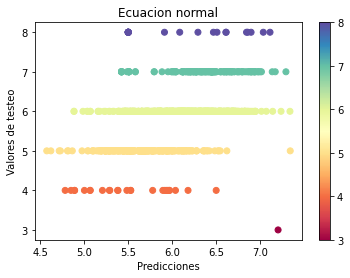

In [20]:
plt.scatter(prediction_normal, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Ecuacion normal')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Batch Gradient descent

In [21]:
number_of_features = x_train.shape[1]

theta_batch = np.random.randn(number_of_features)/100
print(theta_batch)

eta = 0.1
max_iter = 2001
m = x_train.shape[0]

flag = True

j_batch = []
i = 0


valor = int(max_iter/4)
corte = valor
costo = 0
last_costo = 0
delta_j = 0
for i in range(max_iter):
    theta_batch = theta_batch - eta*(1/m * (x_train.T.dot((np.dot(x_train, theta_batch))  - y_train)))
    costo = (1/(2*m))* np.square((np.dot(x_train, theta_batch)  - y_train)).sum()
    j_batch.append(costo)
   
    prediction_batch_des = prediction_raw(theta_batch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_batch_des)

    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) es {}".format(abs(last_costo - costo)))
        corte = corte + valor
        delta_j = abs(last_costo - costo)
        print()
    last_costo = costo

print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) es {}".format(delta_j))
print("Los valores de theta fueron: ")
print(theta_batch)



[-0.00108118  0.01236662 -0.00222898  0.01981192  0.0079468   0.00353709
  0.00961009  0.00773174 -0.00179754 -0.00684264 -0.01259024 -0.00619567]
El valor 500 es un punto de corte
El valor [0.76334191] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 4.1086069049678375e-05

El valor 1000 es un punto de corte
El valor [0.74202765] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 1.875338142437455e-05

El valor 1500 es un punto de corte
El valor [0.72910872] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 1.0157983313829888e-05

El valor 2000 es un punto de corte
El valor [0.72201838] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 5.870683622510864e-06

Numero de iteraciones 2000
La meta se cumplio en [0.72201838] se buscaba [0.71255098]
La diferencia entre J(i) es 5.870683622510864e-06
Los valores de theta fueron: 
[ 4.40641482  0.078149

In [22]:
prediction_batch_des.reshape(len(prediction_batch_des), 1)[:10]

array([[6.63004934],
       [6.04289686],
       [5.84801586],
       [6.51550071],
       [5.3383249 ],
       [5.3383249 ],
       [5.51643282],
       [5.76342927],
       [6.12862265],
       [5.41032532]])

In [23]:
y_test[:10]

array([[6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5]])

In [24]:
Root_Mean_Squared_Error(y_test, prediction_batch_des)

array([0.72201838])

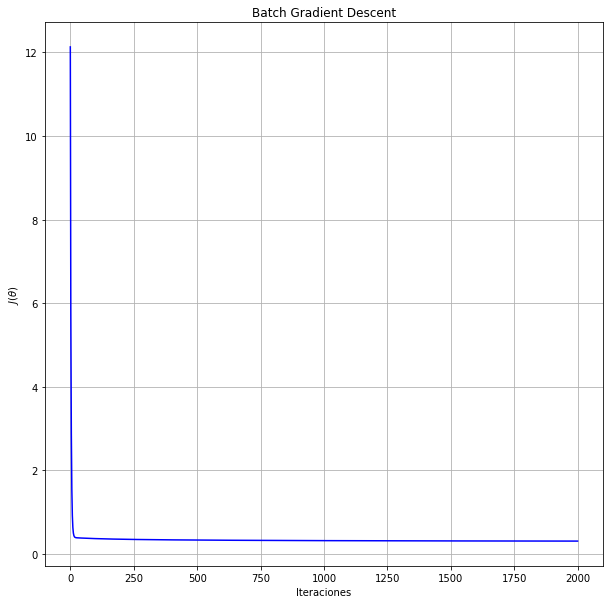

In [25]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_batch)),j_batch,"b-")
plt.title('Batch Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()


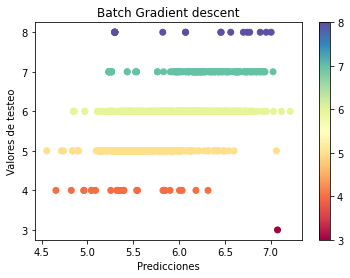

In [26]:
plt.scatter(prediction_batch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Batch Gradient descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Stochastic Gradient Descent

In [27]:


number_of_features = x_train.shape[1]

theta_stoch =  np.random.randn(number_of_features)/100

print(theta_stoch)

eta = 0.1
flag = True
j_stoch = []
i = 0

valor = int(max_iter/4)
corte = valor
costo = 0

for i in range(max_iter):
    costo = 0
    for j in range(m):
        random_indices = np.random.randint(0 ,m -1)
        x_stoch = x_train[random_indices]
        y_stoch = y_train[random_indices]

        theta_stoch = theta_stoch - eta*(1/m * x_stoch.T.dot(((np.dot(x_stoch, theta_stoch))  - y_stoch)))
    
        costo += (1/(2*m))* np.sum(np.square((np.dot(x_stoch, theta_stoch)  - y_stoch)))
    j_stoch.append(costo)

    prediction_stoch_des = prediction_raw(theta_stoch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_stoch_des)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) es {}".format(abs(last_costo - costo)))
        corte = corte + valor
        delta_j = abs(last_costo - costo)
        print()
    last_costo = costo

print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) es {}".format(delta_j))
print("Los valores de theta fueron: ")
theta_stoch

[ 0.00842347 -0.01420714  0.0083016  -0.00443256 -0.00774601 -0.00368195
  0.01797435  0.0217215   0.00104778 -0.0011531  -0.00547431 -0.005052  ]
El valor 500 es un punto de corte
El valor [0.76397009] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.018476939241306223

El valor 1000 es un punto de corte
El valor [0.74200256] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.0077795091246583015

El valor 1500 es un punto de corte
El valor [0.72992886] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.0010570856128188644

El valor 2000 es un punto de corte
El valor [0.72208756] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.020729448067052847

Numero de iteraciones 2000
La meta se cumplio en [0.72208756] se buscaba [0.71255098]
La diferencia entre J(i) es 0.020729448067052847
Los valores de theta fueron: 


array([ 4.4076852 ,  0.07841906, -1.42107384,  0.29015339,  0.93550485,
       -0.08156485,  0.97138068,  0.24977658,  0.13110967,  0.62818678,
        0.39640152,  2.47803625])

In [28]:
prediction_stoch_des.reshape(len(prediction_stoch_des), 1)[:10]

array([[6.63166288],
       [6.04258741],
       [5.84626915],
       [6.51626549],
       [5.33944654],
       [5.33944654],
       [5.51839977],
       [5.76126454],
       [6.12827841],
       [5.40683353]])

In [29]:
y_test[:10]

array([[6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5]])

In [30]:
Root_Mean_Squared_Error(y_test, prediction_stoch_des)

array([0.72208756])

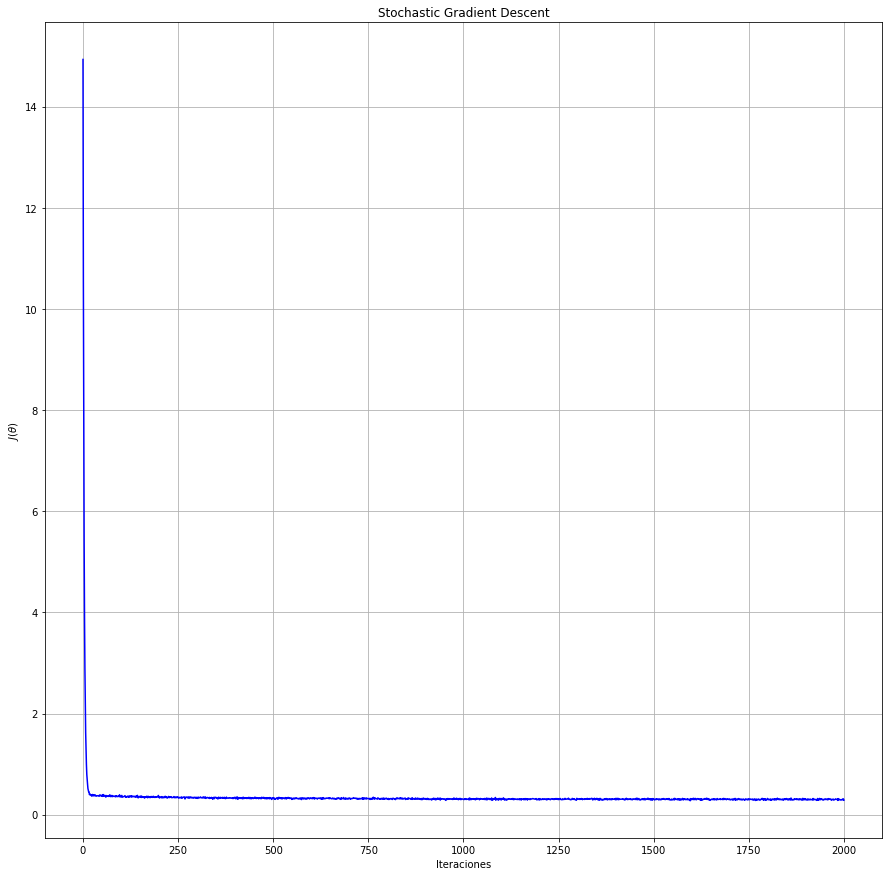

In [31]:
plt.figure(figsize=(15,15))   
plt.plot(np.arange(len(j_stoch)),j_stoch,"b-")
plt.title('Stochastic Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

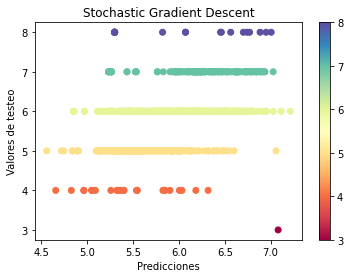

In [32]:
plt.scatter(prediction_stoch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Stochastic Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Mini-Batch Gradient Descent

In [33]:
number_of_features = x_train.shape[1]

theta_mini =np.random.randn(number_of_features)/100

print(theta_mini)

eta = 0.1
batch_size = 64

flag = True
j_mini = []
i = 0

valor = int(max_iter/4)
corte = valor
costo = 0

for i in range(max_iter):
    random_indices = np.random.permutation(m)
    x_batch_size = x_train[random_indices]
    y_batch_size = y_train[random_indices]
    costo = 0.0
    for j in range(0 , m , batch_size):
        x_mini = x_batch_size[j:j + batch_size]
        y_mini = y_batch_size[j:j + batch_size]
        theta_mini =  theta_mini  - (eta/m) * (x_mini.T.dot(((np.dot(theta_mini, x_mini.T)) - y_mini)))
        costo = (1/(2*m))* np.sum(np.square((np.dot(x_mini, theta_mini)  - y_mini))) 
    j_mini.append(costo)  
    
    prediction_mini = prediction_raw(theta_mini, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_mini)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) es {}".format(abs(last_costo - costo)))
        corte = corte + valor
        delta_j = abs(last_costo - costo)
        print()
    last_costo = costo

print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) es {}".format(delta_j))
print("Los valores de theta fueron: ")
theta_mini

[ 0.00621639  0.00192327  0.00429344 -0.00295288  0.00062128  0.0297076
  0.01211917  0.00054651  0.00303542  0.01610086  0.01457317  0.01014866]
El valor 500 es un punto de corte
El valor [0.76385388] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.0005054427920521571

El valor 1000 es un punto de corte
El valor [0.74219019] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.00039163735552309677

El valor 1500 es un punto de corte
El valor [0.72917336] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.0010856950447970053

El valor 2000 es un punto de corte
El valor [0.72205152] representa al RMSE actual se quiere llegar a [0.71255098]
La diferencia entre J(i) es 0.001166156447317089

Numero de iteraciones 2000
La meta se cumplio en [0.72205152] se buscaba [0.71255098]
La diferencia entre J(i) es 0.001166156447317089
Los valores de theta fueron: 


array([ 4.40547819,  0.07781979, -1.42572214,  0.28906875,  0.94746685,
       -0.06227135,  0.96913558,  0.24242332,  0.13325808,  0.63202209,
        0.40107494,  2.47877719])

In [34]:
prediction_mini.reshape(len(prediction_mini), 1)[:10]

array([[6.630451  ],
       [6.04295972],
       [5.84863341],
       [6.51584528],
       [5.33821878],
       [5.33821878],
       [5.51604946],
       [5.76399029],
       [6.12859364],
       [5.40996622]])

In [35]:
y_test[:10]

array([[6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5]])

In [36]:
Root_Mean_Squared_Error(y_test, prediction_mini)

array([0.72205152])

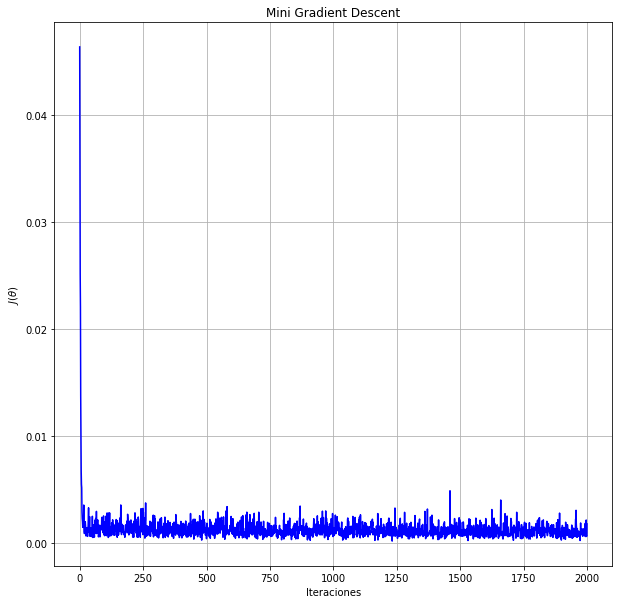

In [37]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_mini)),j_mini,"b-")
plt.title('Mini Gradient Descent')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

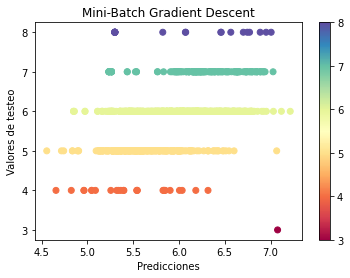

In [38]:
plt.scatter(prediction_mini, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Comparacion

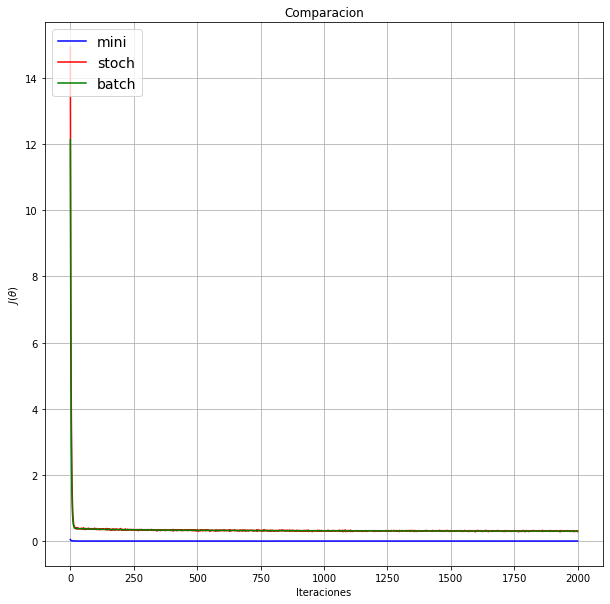

In [39]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_mini)),j_mini,"b-", label="mini")
plt.plot(np.arange(len(j_stoch)),j_stoch,"r-", label="stoch")
plt.plot(np.arange(len(j_batch)),j_batch,"g-", label="batch")
plt.legend(loc="upper left", fontsize=14)
plt.title('Comparacion')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()